In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Some Variables
x = tf.ones(shape=(2,1))
print(x)

x = tf.zeros(shape=(4,3))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float32)


In [2]:
# TensorFlow Variables
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)

# Assign a value
v.assign(tf.ones((3,1)))
print(v)

# Assign to subset
v[0,0].assign(5)
print(v)

# Operations between tensors
a = tf.ones((2,2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a,b)
e *= d
print(e)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.4014292 ],
       [-1.2144301 ],
       [ 0.37615263]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[5.],
       [1.],
       [1.]], dtype=float32)>
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [3]:
# GradientTape
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)

# Double differentiation
time = tf.Variable(initial_value=0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time**2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(acceleration)

tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


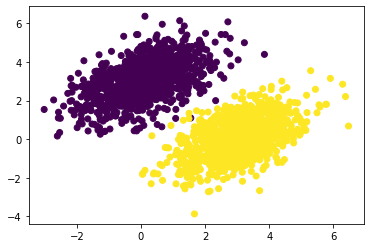

In [9]:
#Linear classifier
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
                    mean = [0,3],
                    cov = [[1, 0.5], [0.5,1]],
                    size = num_samples_per_class)

positive_samples = np.random.multivariate_normal(
                    mean = [3,0],
                    cov = [[1, 0.5], [0.5,1]],
                    size = num_samples_per_class)

# All inputs in one array
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

# Generate Labels
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

# Plot
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()


In [20]:
# Create linear classifier
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros((output_dim,)))

# Forward pass
def model(inputs):
    return tf.matmul(inputs, W) + b

# Loss function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

# Training step
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_w, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_w * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

# Batch training
for step in range(1000):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step} : {loss:.4f}")


Loss at step 0 : 3.3501
Loss at step 1 : 0.5977
Loss at step 2 : 0.2027
Loss at step 3 : 0.1344
Loss at step 4 : 0.1167
Loss at step 5 : 0.1074
Loss at step 6 : 0.0999
Loss at step 7 : 0.0932
Loss at step 8 : 0.0872
Loss at step 9 : 0.0817
Loss at step 10 : 0.0766
Loss at step 11 : 0.0721
Loss at step 12 : 0.0679
Loss at step 13 : 0.0641
Loss at step 14 : 0.0606
Loss at step 15 : 0.0574
Loss at step 16 : 0.0545
Loss at step 17 : 0.0519
Loss at step 18 : 0.0495
Loss at step 19 : 0.0473
Loss at step 20 : 0.0453
Loss at step 21 : 0.0435
Loss at step 22 : 0.0418
Loss at step 23 : 0.0403
Loss at step 24 : 0.0389
Loss at step 25 : 0.0377
Loss at step 26 : 0.0365
Loss at step 27 : 0.0355
Loss at step 28 : 0.0345
Loss at step 29 : 0.0337
Loss at step 30 : 0.0329
Loss at step 31 : 0.0321
Loss at step 32 : 0.0315
Loss at step 33 : 0.0309
Loss at step 34 : 0.0303
Loss at step 35 : 0.0298
Loss at step 36 : 0.0294
Loss at step 37 : 0.0290
Loss at step 38 : 0.0286
Loss at step 39 : 0.0282
Loss at st

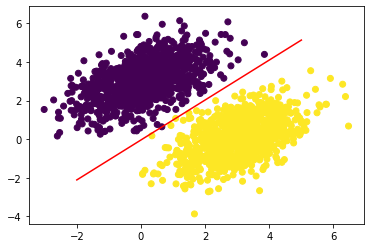

In [26]:
# Plot predictions (with boundary line)
x = np.linspace(-2,5,100)
y = -W[0] / W[1] * x + (0.5-b)/W[1]
predictions = model(inputs)
plt.plot(x, y, "-r")
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)
plt.show()

In [45]:
# Dense layer as Layer subclass
from tensorflow import keras

class SimpleDense(keras.layers.Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                initializer="zeros")
    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

# Test
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2,784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [61]:
# Solving with keras (i.e. keras example)
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(),
            loss=keras.losses.MeanSquaredError(),
            metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]
num_validation_samples = int(0.1 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(training_inputs,
        training_targets,
        epochs=500,
        batch_size=256,
        validation_data=(val_inputs, val_targets))


Epoch 1/500
8/8 [==============================] - 0s 22ms/step - loss: 5.1930 - binary_accuracy: 0.7789 - val_loss: 4.4213 - val_binary_accuracy: 0.8050
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 5.0045 - binary_accuracy: 0.7861 - val_loss: 4.3032 - val_binary_accuracy: 0.8100
Epoch 3/500
8/8 [==============================] - 0s 7ms/step - loss: 4.8702 - binary_accuracy: 0.7900 - val_loss: 4.2040 - val_binary_accuracy: 0.8150
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 4.7513 - binary_accuracy: 0.7950 - val_loss: 4.0966 - val_binary_accuracy: 0.8200
Epoch 5/500
8/8 [==============================] - 0s 7ms/step - loss: 4.6275 - binary_accuracy: 0.7983 - val_loss: 4.0078 - val_binary_accuracy: 0.8250
Epoch 6/500
8/8 [==============================] - 0s 6ms/step - loss: 4.5198 - binary_accuracy: 0.8022 - val_loss: 3.9176 - val_binary_accuracy: 0.8250
Epoch 7/500
8/8 [==============================] - 0s 6ms/step - loss: 4.4121 - b

In [62]:
# Evaluate on validation set
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)

2/2 [==============================] - 0s 3ms/step - loss: 0.0195 - binary_accuracy: 1.0000


In [63]:
loss_and_metrics

[0.019482625648379326, 1.0]